# EMPLOYEE ATTRITION PREDICTION USING ML

Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)

## Importing Data

In [4]:
df = pd.read_csv('1000000 HRA Records.csv')

### Data

 The dataset we have use is publicly available.The dataset has (1000000R X 35C) that contains numeric and categorical data types describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else. Machine Learning models can help to understand and determine how these factors relate to workforce attrition.

In [6]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,1,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,Y,No,34,2,2,80,4,40,3,4,31,28,1,29
1,18,Yes,Travel_Rarely,720,Sales,34,2,Technical Degree,1,2,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Y,Yes,18,4,1,80,3,25,5,3,8,5,4,8
2,25,No,Non-Travel,1406,Support,3,2,Life Sciences,1,3,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Y,Yes,48,1,3,80,4,13,2,3,5,1,1,3
3,38,Yes,Travel_Frequently,1316,Software,19,5,Other,1,4,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Y,Yes,12,4,4,80,3,29,5,4,5,3,1,1
4,35,No,Travel_Rarely,711,Research & Development,28,4,Technical Degree,1,5,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Y,Yes,47,4,4,80,3,1,1,4,1,1,1,1


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
999995,19,Yes,Travel_Rarely,389,Sales,22,1,Human Resources,1,999996,2,Male,122,1,3,Healthcare Representative,3,Married,30138,241104,0,Y,No,48,3,2,80,2,12,5,1,8,1,6,2
999996,24,No,Non-Travel,1248,Hardware,7,5,Life Sciences,1,999997,2,Male,187,3,1,Developer,2,Divorced,39771,1073817,0,Y,No,42,2,4,80,3,32,2,3,1,1,1,1
999997,55,No,Non-Travel,1298,Support,33,5,Human Resources,1,999998,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,Y,No,26,3,4,80,1,29,4,4,28,19,16,26
999998,44,Yes,Non-Travel,1065,Research & Development,34,3,Human Resources,1,999999,4,Female,102,2,1,Healthcare Representative,3,Married,9736,48680,7,Y,Yes,25,3,3,80,4,20,2,3,2,2,1,2
999999,19,Yes,Non-Travel,776,Research & Development,23,4,Human Resources,1,1000000,1,Female,189,3,1,Research Director,2,Divorced,41602,249612,1,Y,Yes,31,3,1,80,1,31,2,3,29,20,22,7


In [8]:
df.shape

(1000000, 35)

### This dataset consist of 1000000 rows and 35 columns.The description about each attribute is:

* BusinessTravel - Business travel is travel undertaken for work or business purposes.
* DailyRate - the prescribed amount of pay for a given job of work paid for by the day or hour.
* Department - It shows to which department an employee belongs to.
* Education - It specifies number of years of education completed.
* EducationField - It shows to which education field an employee belongs to.
* EnvironmentSatisfaction - Numerical Value - satisfaction with the environment.
* HourlyRate - it shows hourly salary.
* JobInvolvement - A person who has a high level of job involvement usually obtains major life satisfaction from the job (1 means High -4 means Low).
* JobLevel - categories with different titles and salary ranges within a workplace (1 means High - 4 means Low).
* JobRole - It simply defines the job position.
* JobSatisfaction - A feeling of fulfilment or enjoyment that a employee derives from their job (1 means High - 4 means Low).
* MonthlyIncome - Amount paid to an employee within a month.
* MonthlyRate - The internal charge out rate which will be used to calculate the cost of each employee monthly, in  general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc.
* MonthlyIncome - Monthly income is just how much the employee earned monthly.
* NumCompaniesWorked - Number of companies an employee worked or experience an employee had.
* OverTime - it simply defines an over time work done by an employee.
* PercentSalaryHike - (New salary - Old salary) * 100 / (Old salary).
* PerformanceRating - It observes the worker's performance and records a value (1 means High - 4 means Low).
* StockOptionLevel - It is issued by the company for its employees to encourage employee ownership in the company. The * * * shares of the companies are given to the employees at discounted rates.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Age                       1000000 non-null  int64 
 1   Attrition                 1000000 non-null  object
 2   BusinessTravel            1000000 non-null  object
 3   DailyRate                 1000000 non-null  int64 
 4   Department                1000000 non-null  object
 5   DistanceFromHome          1000000 non-null  int64 
 6   Education                 1000000 non-null  int64 
 7   EducationField            1000000 non-null  object
 8   EmployeeCount             1000000 non-null  int64 
 9   EmployeeNumber            1000000 non-null  int64 
 10  EnvironmentSatisfaction   1000000 non-null  int64 
 11  Gender                    1000000 non-null  object
 12  HourlyRate                1000000 non-null  int64 
 13  JobInvolvement            1000000 non-null 

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Checking null values in each column

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Checking for duplicate values in each column

In [12]:
df.duplicated().sum()

0

Cheking datatype of each column.

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Checking count of unique values in each column

In [14]:
df.nunique()

Age                              43
Attrition                         2
BusinessTravel                    3
DailyRate                      1401
Department                        6
DistanceFromHome                 50
Education                         5
EducationField                    6
EmployeeCount                     1
EmployeeNumber              1000000
EnvironmentSatisfaction           4
Gender                            2
HourlyRate                      171
JobInvolvement                    4
JobLevel                          5
JobRole                          10
JobSatisfaction                   4
MaritalStatus                     3
MonthlyIncome                 50000
MonthlyRate                  442523
NumCompaniesWorked                9
Over18                            1
OverTime                          2
PercentSalaryHike                50
PerformanceRating                 4
RelationshipSatisfaction          4
StandardHours                     1
StockOptionLevel            

## Unique Values Of Each Column

In [15]:
for col in df.columns:
    if df[col].dtypes != object:
        print('{} : {}'.format(col,df[col].unique()[:30]))
        print(df[col].nunique())
        print("-----------------------------------------------------------------------------")

Age : [58 18 25 38 35 23 43 37 34 20 48 42 33 32 30 31 26 54 44 55 59 60 40 46
 36 27 21 56 53 24]
43
-----------------------------------------------------------------------------
DailyRate : [ 200  720 1406 1316  711  224 1091 1077  788 1199  593  184  436  595
 1165 1097 1144  884 1462 1015  261 1188  496  693 1127 1373  942 1009
 1148  892]
1401
-----------------------------------------------------------------------------
DistanceFromHome : [13 34  3 19 28 26  6 16 41 10 11 24  2 38 22 39 25 33 20 29  9  5 43 40
 50  7 14 17  8 35]
50
-----------------------------------------------------------------------------
Education : [5 2 4 1 3]
5
-----------------------------------------------------------------------------
EmployeeCount : [1]
1
-----------------------------------------------------------------------------
EmployeeNumber : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
1000000
--------------------------------------------------------

#### Descriptive stat for categorical analysis

In [16]:
for i in df.columns:
    if(df.dtypes[i]=="object"):
        print(i)
        print(df[i].value_counts())
        print()

Attrition
No     500081
Yes    499919
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        333773
Non-Travel           333205
Travel_Frequently    333022
Name: BusinessTravel, dtype: int64

Department
Hardware                  167090
Software                  166974
Sales                     166743
Research & Development    166679
Human Resources           166420
Support                   166094
Name: Department, dtype: int64

EducationField
Medical             167094
Life Sciences       167000
Technical Degree    166634
Human Resources     166562
Other               166431
Marketing           166279
Name: EducationField, dtype: int64

Gender
Female    500073
Male      499927
Name: Gender, dtype: int64

JobRole
Human Resources              100503
Developer                    100194
Manufacturing Director       100110
Sales Representative         100043
Sales Executive               99986
Healthcare Representative     99881
Laboratory Technician         99863
Research Scie

From the above output all the employees are above 18 , so this fiels does not add any value

In [17]:
df.drop('Over18',axis=1,inplace = True)

In [18]:
for col in df.columns:
    if df[col].dtypes != object:
        print('{} : {}'.format(col,df[col].unique()))
        print(df[col].nunique())
        print("-----------------------------------------------------------------------------")

Age : [58 18 25 38 35 23 43 37 34 20 48 42 33 32 30 31 26 54 44 55 59 60 40 46
 36 27 21 56 53 24 47 49 45 19 29 22 51 57 50 41 28 52 39]
43
-----------------------------------------------------------------------------
DailyRate : [ 200  720 1406 ... 1150  764 1425]
1401
-----------------------------------------------------------------------------
DistanceFromHome : [13 34  3 19 28 26  6 16 41 10 11 24  2 38 22 39 25 33 20 29  9  5 43 40
 50  7 14 17  8 35 48 12  1 18 30 45 42 15 27 23 31 44 49 47 32 37 46 36
  4 21]
50
-----------------------------------------------------------------------------
Education : [5 2 4 1 3]
5
-----------------------------------------------------------------------------
EmployeeCount : [1]
1
-----------------------------------------------------------------------------
EmployeeNumber : [      1       2       3 ...  999998  999999 1000000]
1000000
-----------------------------------------------------------------------------
EnvironmentSatisfaction : [1 2 4 3]

Dropping The Feature "EmployeeNumber" because it seems Unimportant as it contain unique values for each row.

In [19]:
df.drop("EmployeeNumber",inplace=True,axis=1)

In [20]:
df.shape

(1000000, 33)

# Univariate Analysis

In [21]:
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,38.976191,799.498643,25.506090,2.999455,1.0,2.501423,115.018539,2.500662,3.000049,2.502119,25985.638494,4.027673e+05,3.994971,24.501936,2.49968,2.499601,80.0,2.501783,20.495472,3.499094,2.501216,10.758434,5.881553,5.874653,5.878886
std,12.403615,404.493606,14.423455,1.413818,0.0,1.117929,49.354764,1.117825,1.414944,1.118409,14439.061316,3.411499e+05,2.582375,14.427649,1.11839,1.117010,0.0,1.118162,11.541989,1.706879,1.117466,8.914784,6.017230,6.001467,6.016144
min,18.000000,100.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1000.000000,1.002000e+03,0.000000,0.000000,1.00000,1.000000,80.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,449.000000,13.000000,2.000000,1.0,2.000000,72.000000,2.000000,2.000000,2.000000,13470.000000,1.210860e+05,2.000000,12.000000,1.00000,2.000000,80.0,2.000000,10.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,39.000000,799.000000,25.000000,3.000000,1.0,3.000000,115.000000,3.000000,3.000000,3.000000,25984.000000,3.060540e+05,4.000000,24.000000,2.00000,2.000000,80.0,3.000000,21.000000,3.000000,3.000000,8.000000,4.000000,4.000000,4.000000
75%,50.000000,1150.000000,38.000000,4.000000,1.0,4.000000,158.000000,4.000000,4.000000,4.000000,38502.000000,6.090000e+05,6.000000,37.000000,4.00000,3.000000,80.0,4.000000,30.000000,5.000000,3.000000,16.000000,8.000000,8.000000,8.000000
max,60.000000,1500.000000,50.000000,5.000000,1.0,4.000000,200.000000,4.000000,5.000000,4.000000,50999.000000,1.529970e+06,8.000000,49.000000,4.00000,4.000000,80.0,4.000000,40.000000,6.000000,4.000000,40.000000,40.000000,40.000000,40.000000


###### Graphical Representation Of Numerical Data Distribution

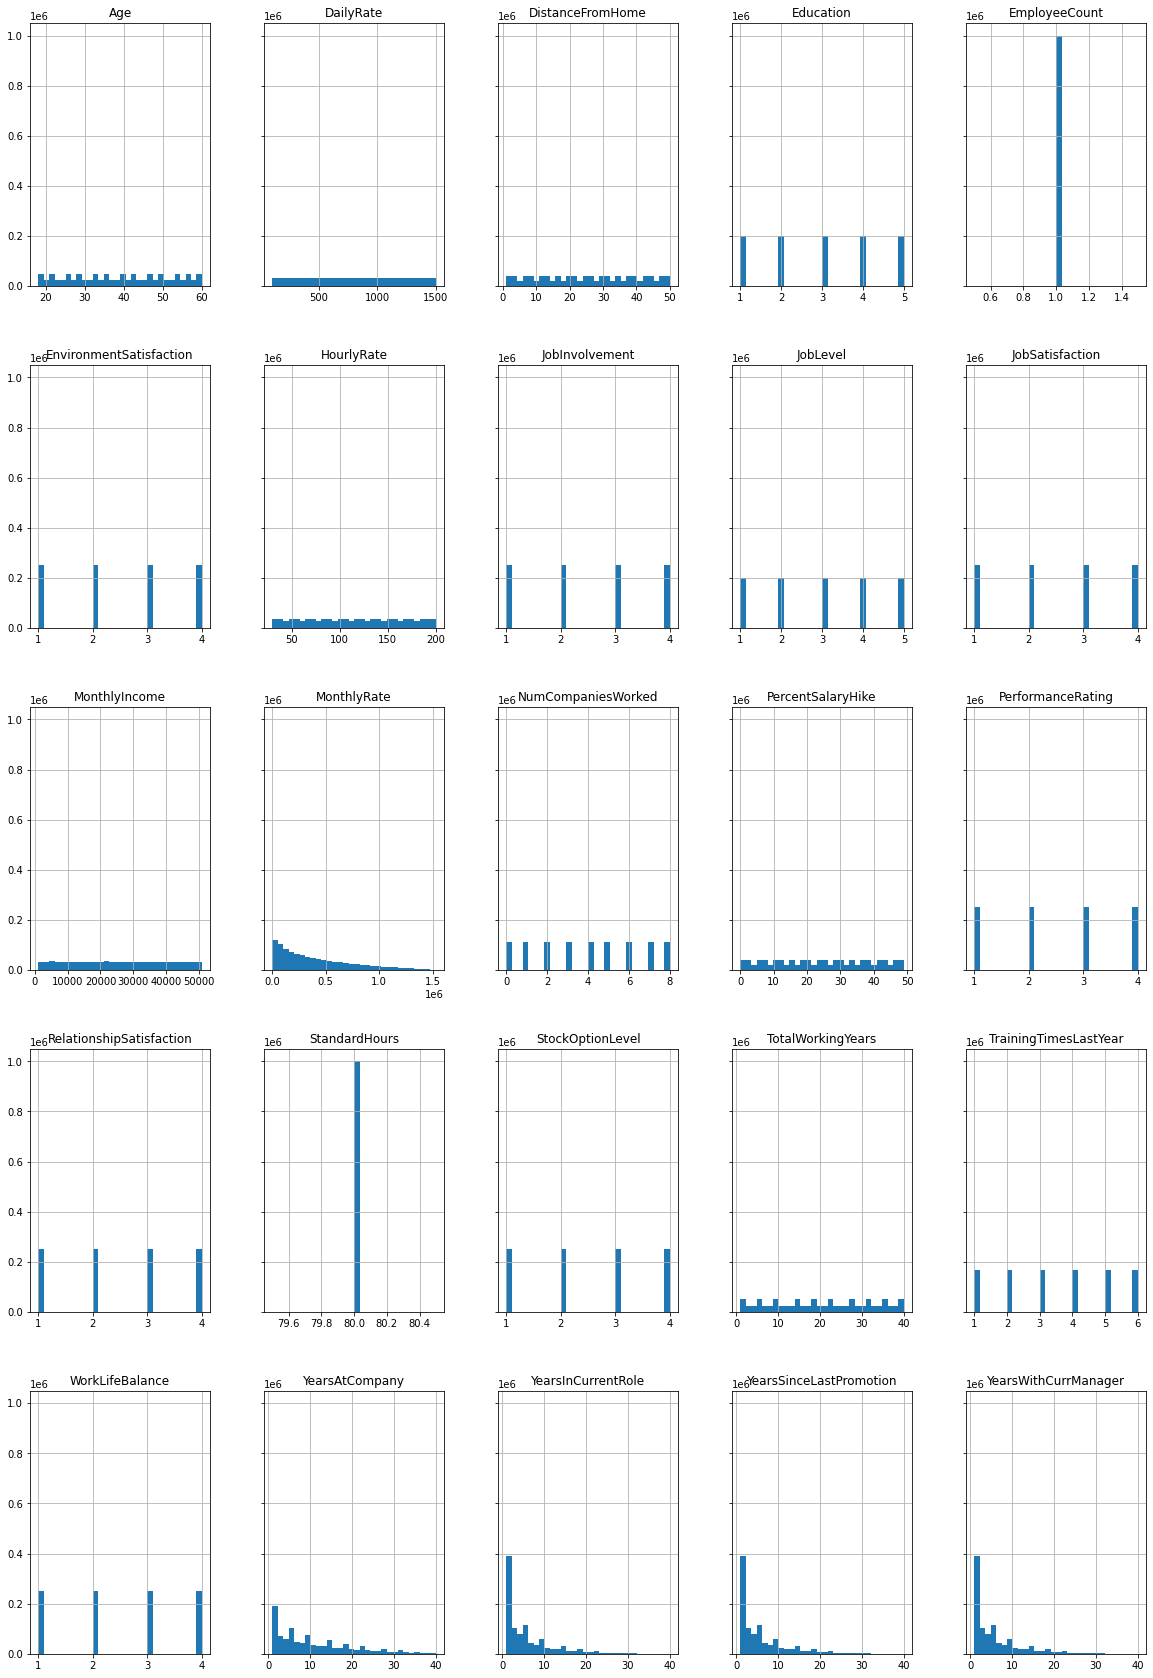

In [80]:
hist = df.hist(bins=30, sharey=True, figsize=(20, 30))

Observation: Standard Deviation(std) of the columns ("EmployeeCount" and "StandardHours") is 0, so they adds no value we can drop them.

In [22]:
df.drop(["EmployeeCount","StandardHours"],inplace=True,axis=1)

In [23]:
df.shape

(1000000, 31)

#### Counting values some object type features

1. Attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

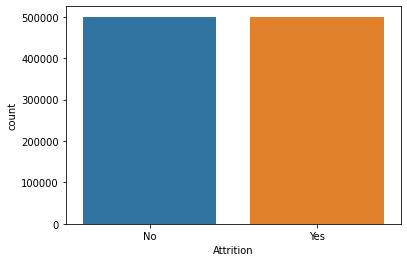

In [83]:
sb.countplot(data = df,x = 'Attrition')

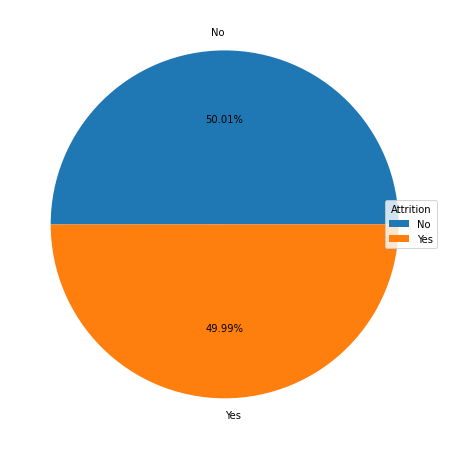

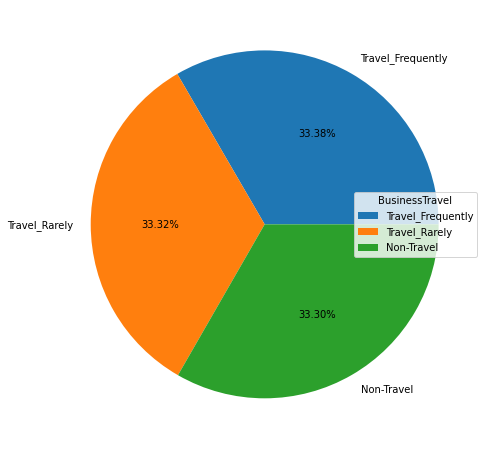

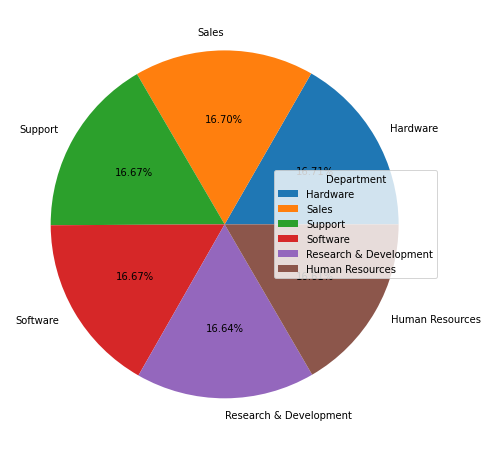

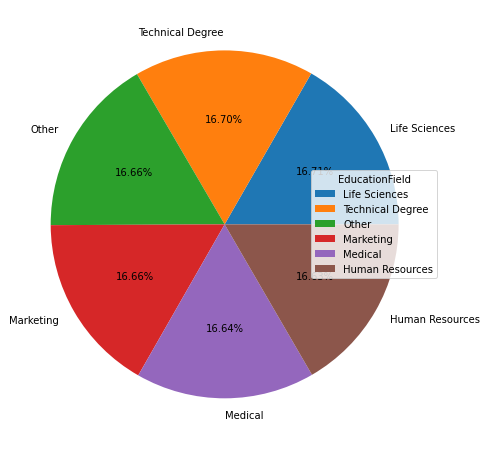

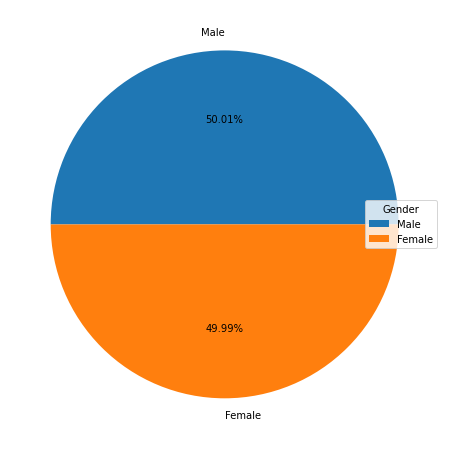

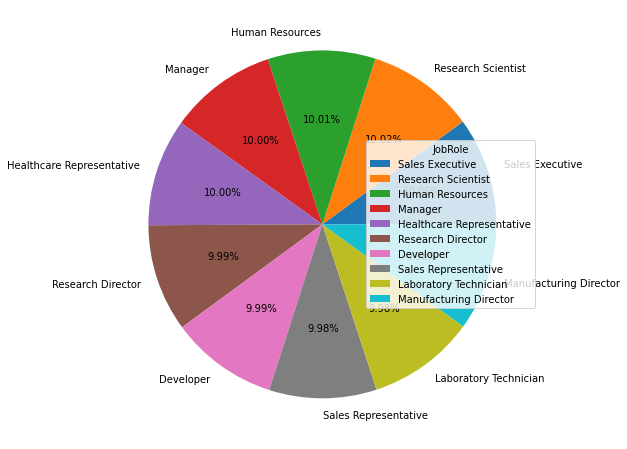

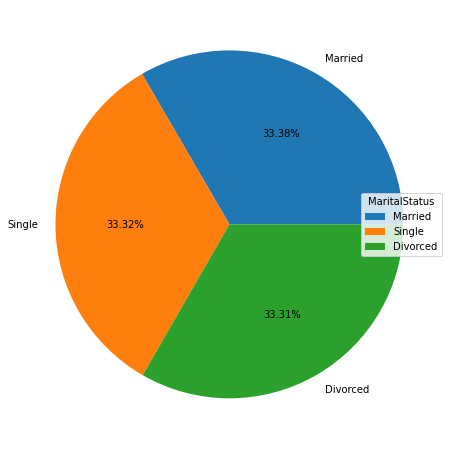

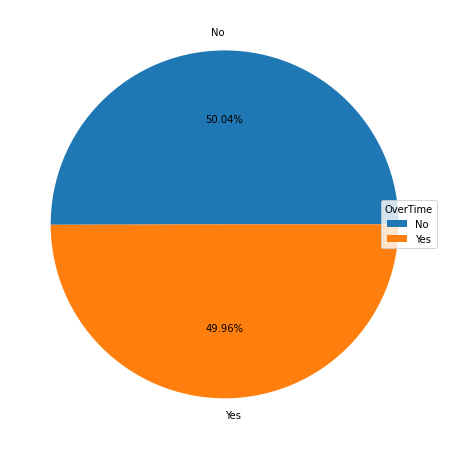

In [84]:
for col in df.columns:
    if df[col].dtypes=='object':
        plt.figure(figsize=(8,8))
        plt.pie(df[col].value_counts(),labels=df[col].unique(),data=df,autopct='%1.2f%%')
        plt.legend(title=col,loc=5)
        plt.show()

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

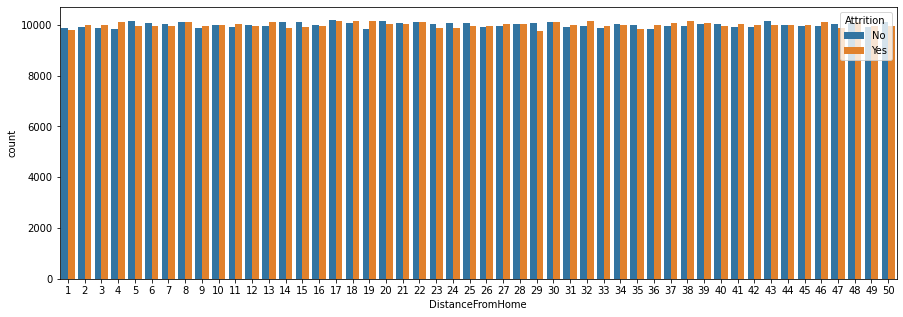

In [85]:
plt.figure(figsize = (15,5))
sb.countplot(data = df,x = 'DistanceFromHome' , hue = 'Attrition')

In [86]:
l = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']

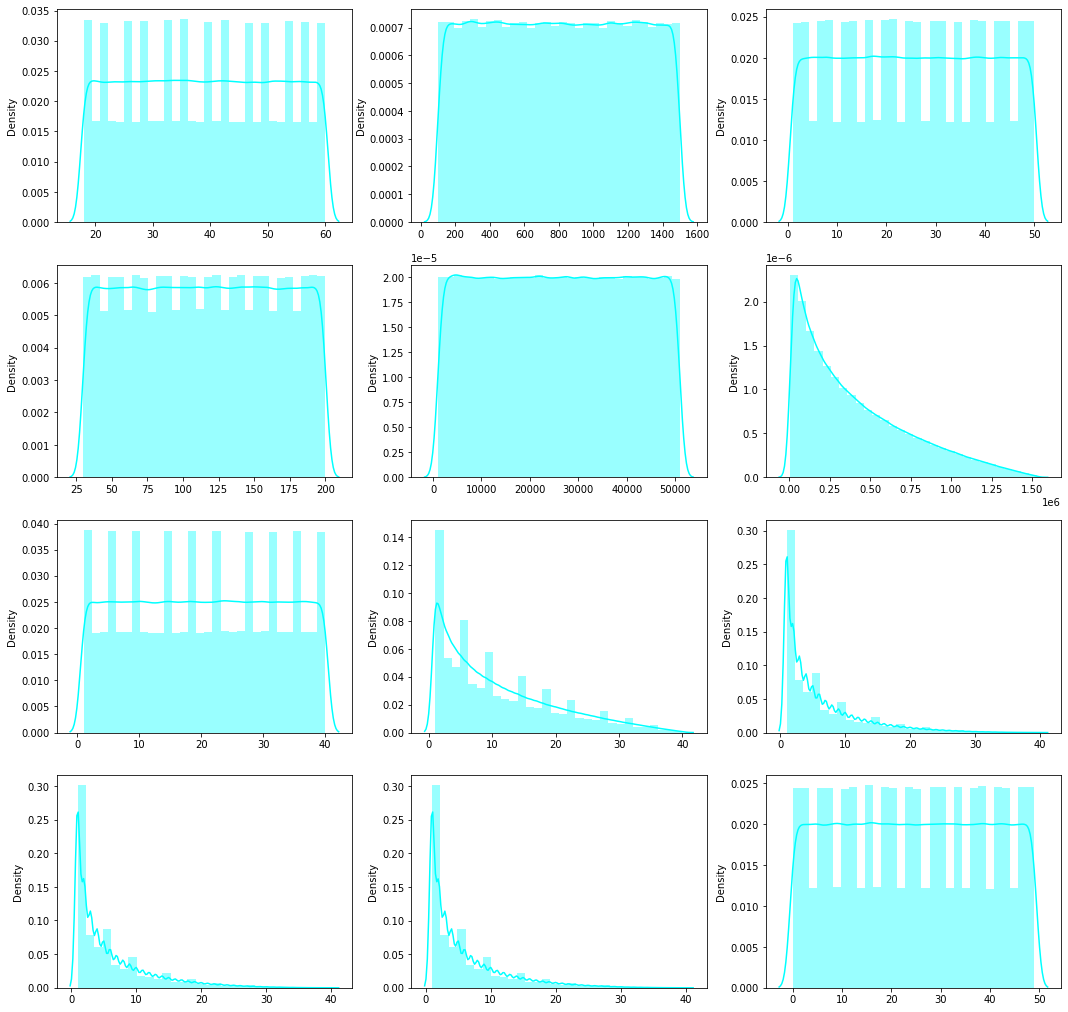

In [87]:
plt.figure(figsize = (18,18))
for i in range(len(l)):
    plt.subplot(4,3, i+1)
    sb.distplot(kde=True,color='cyan',bins=30,x = df[l[i]])
    plt.xlable=df[l].columns[i]

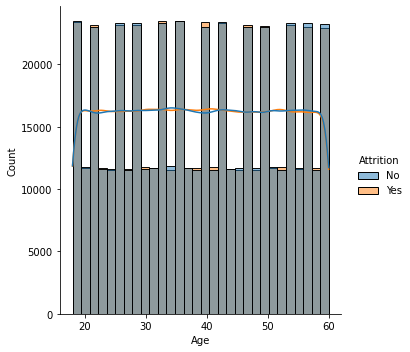

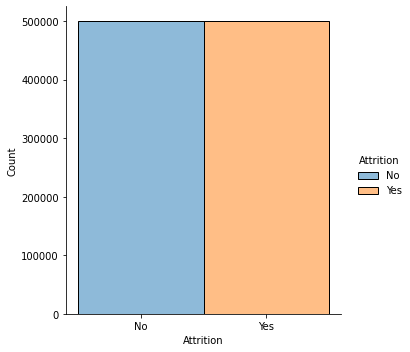

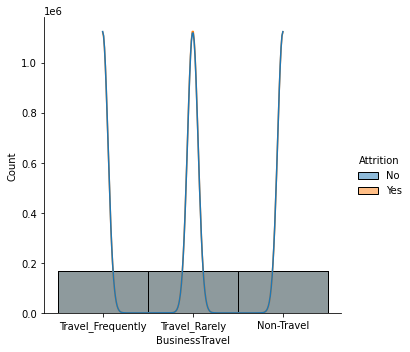

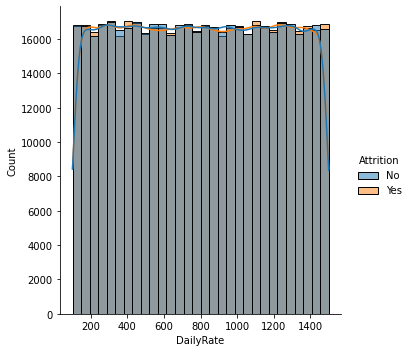

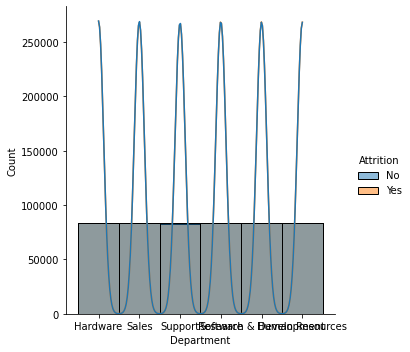

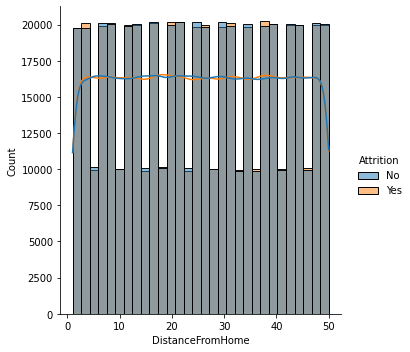

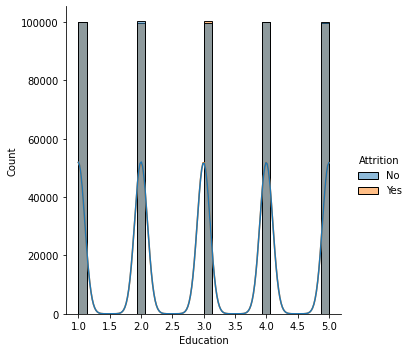

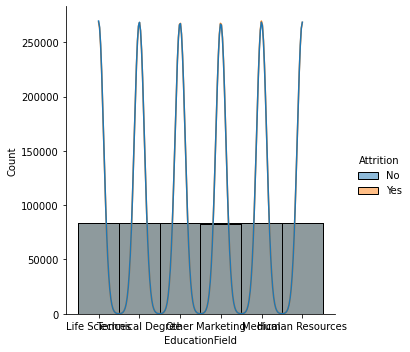

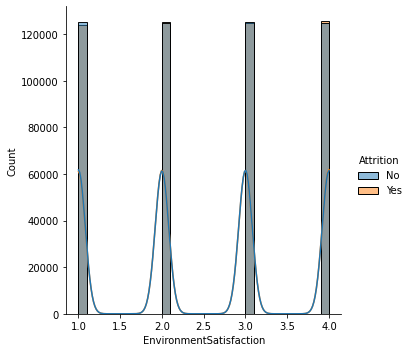

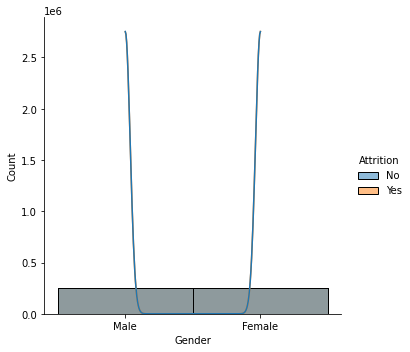

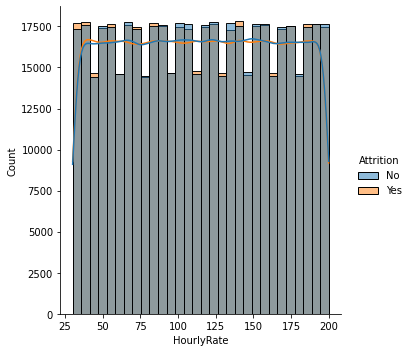

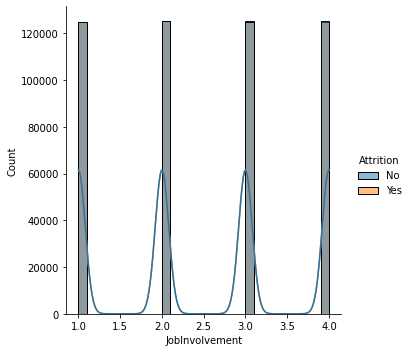

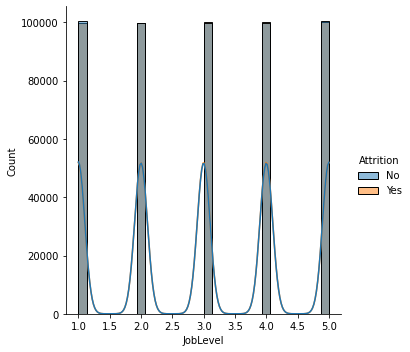

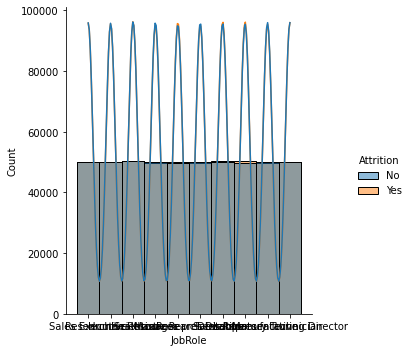

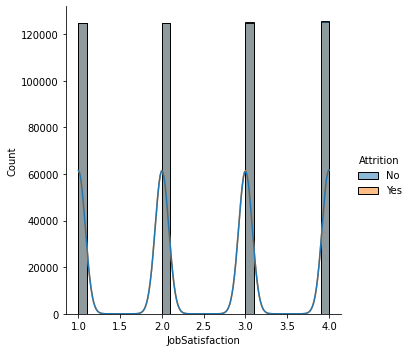

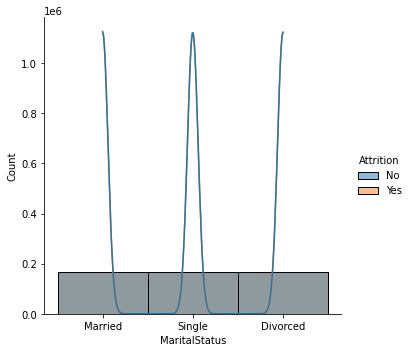

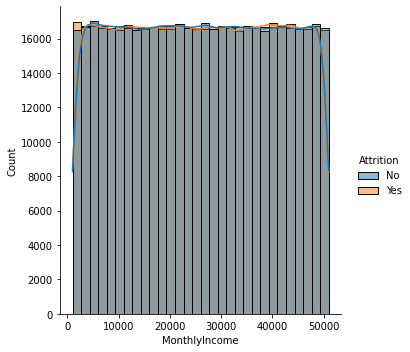

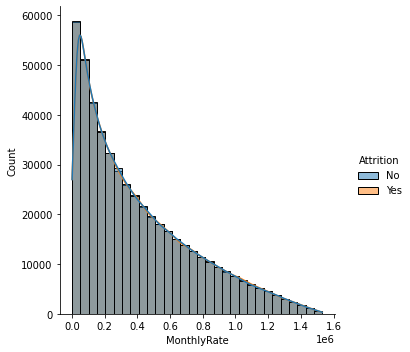

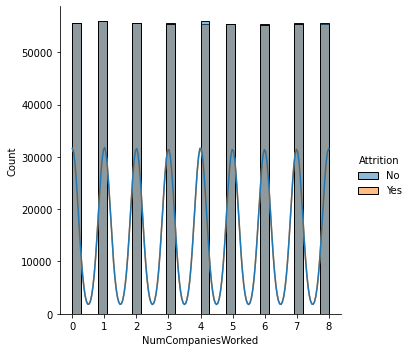

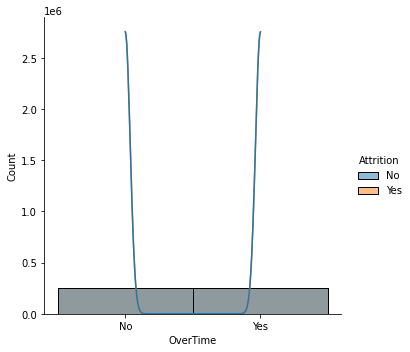

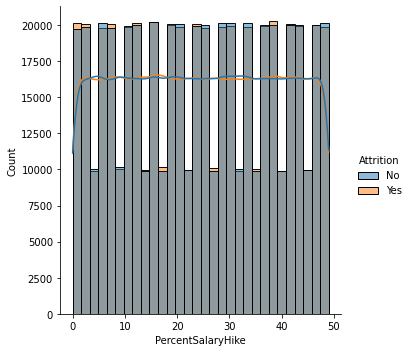

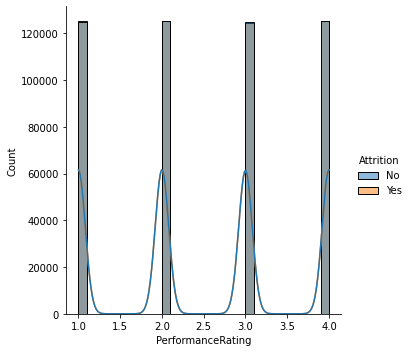

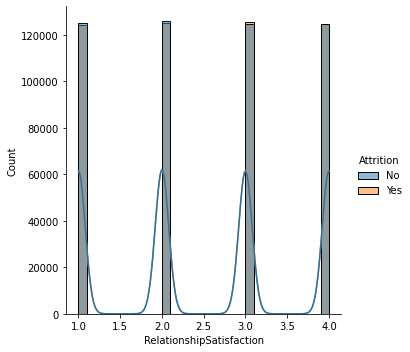

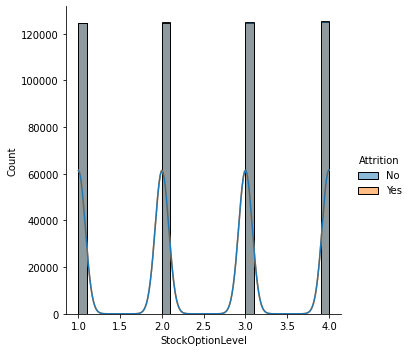

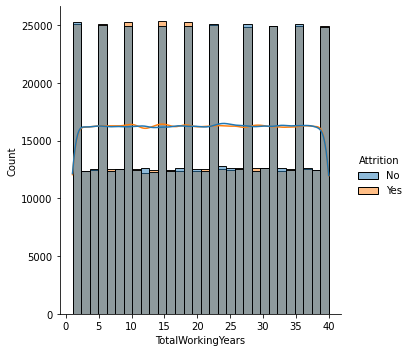

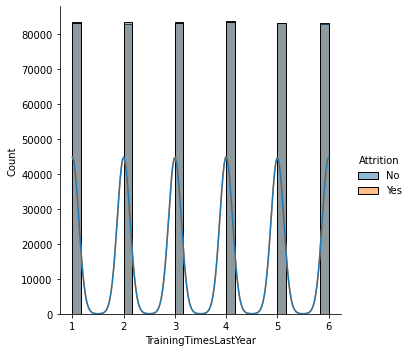

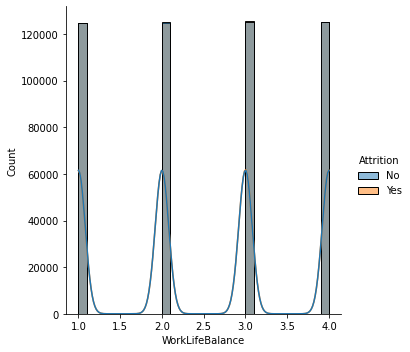

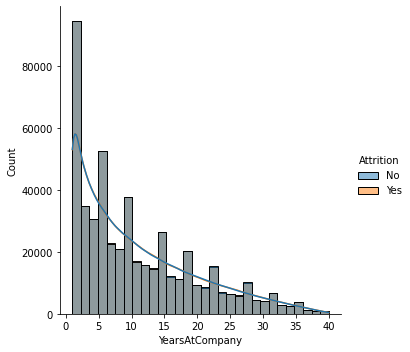

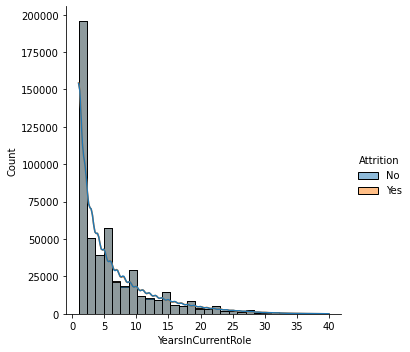

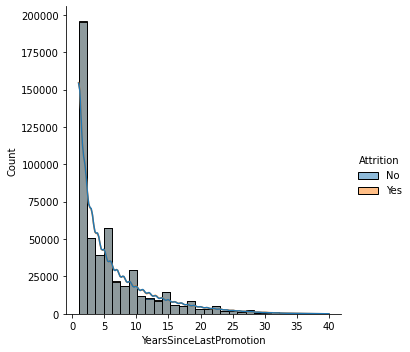

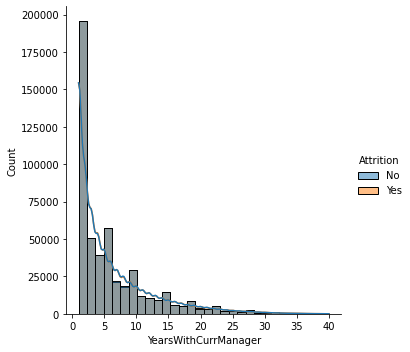

In [88]:
for i in df.columns:
    sb.displot(data=df,x=i,kde=True,bins = 30,hue='Attrition')

# Bivariate Analysis

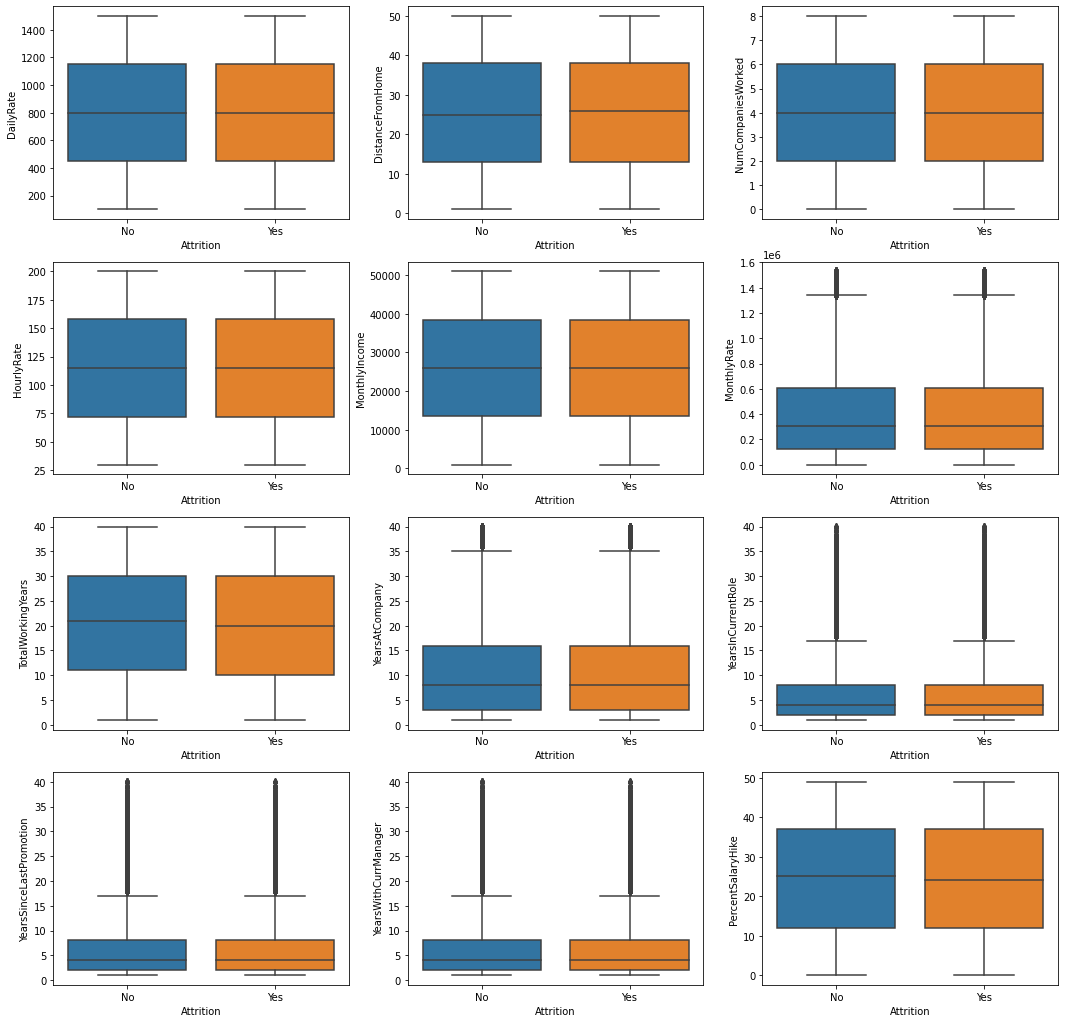

In [90]:
r = ['DailyRate','DistanceFromHome','NumCompaniesWorked','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']
plt.figure(figsize = (18,18))
for i in range(len(r)):
    plt.subplot(4,3, i+1)
    sb.boxplot(data = df, x='Attrition',y = df[r[i]])

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

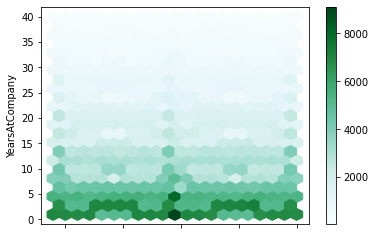

In [91]:
df.plot.hexbin(x = 'Age',y = 'YearsAtCompany',gridsize = 20)

A hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data points. Without overlapping of the points, the plotting window is split into several hexbins. The color of each hexbin denotes the number of points in it

<AxesSubplot:xlabel='MonthlyRate', ylabel='YearsAtCompany'>

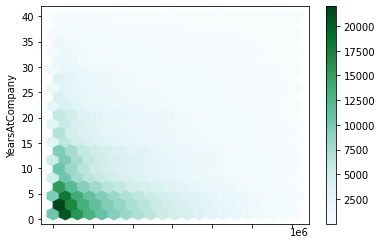

In [93]:
df.plot.hexbin(x = 'MonthlyRate',y = 'YearsAtCompany',gridsize = 20)

<AxesSubplot:xlabel='MonthlyRate', ylabel='YearsSinceLastPromotion'>

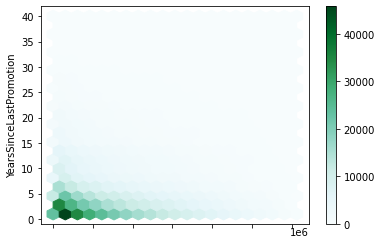

In [94]:
df.plot.hexbin(x = 'MonthlyRate',y = 'YearsSinceLastPromotion',gridsize = 20)

In [95]:
for column in df.columns:
    if df[column].dtypes=='object':
        display(pd.crosstab(df[column],df.Attrition))

Attrition,No,Yes
Attrition,,
No,500081,0
Yes,0,499919


Attrition,No,Yes
BusinessTravel,,
Non-Travel,166774,166431
Travel_Frequently,166801,166221
Travel_Rarely,166506,167267


Attrition,No,Yes
Department,,
Hardware,83563,83527
Human Resources,83183,83237
Research & Development,83286,83393
Sales,83469,83274
Software,83453,83521
Support,83127,82967


Attrition,No,Yes
EducationField,,
Human Resources,83346,83216
Life Sciences,83681,83319
Marketing,83047,83232
Medical,83416,83678
Other,83202,83229
Technical Degree,83389,83245


Attrition,No,Yes
Gender,,
Female,250024,250049
Male,250057,249870


Attrition,No,Yes
JobRole,,
Developer,49956,50238
Healthcare Representative,49752,50129
Human Resources,50246,50257
Laboratory Technician,50083,49780
Manager,50104,49699
Manufacturing Director,50061,50049
Research Director,50049,49727
Research Scientist,49975,49866
Sales Executive,50011,49975


Attrition,No,Yes
MaritalStatus,,
Divorced,166631,166419
Married,166666,167113
Single,166784,166387


Attrition,No,Yes
OverTime,,
No,250028,250359
Yes,250053,249560


# Multivariate Analysis

<AxesSubplot:>

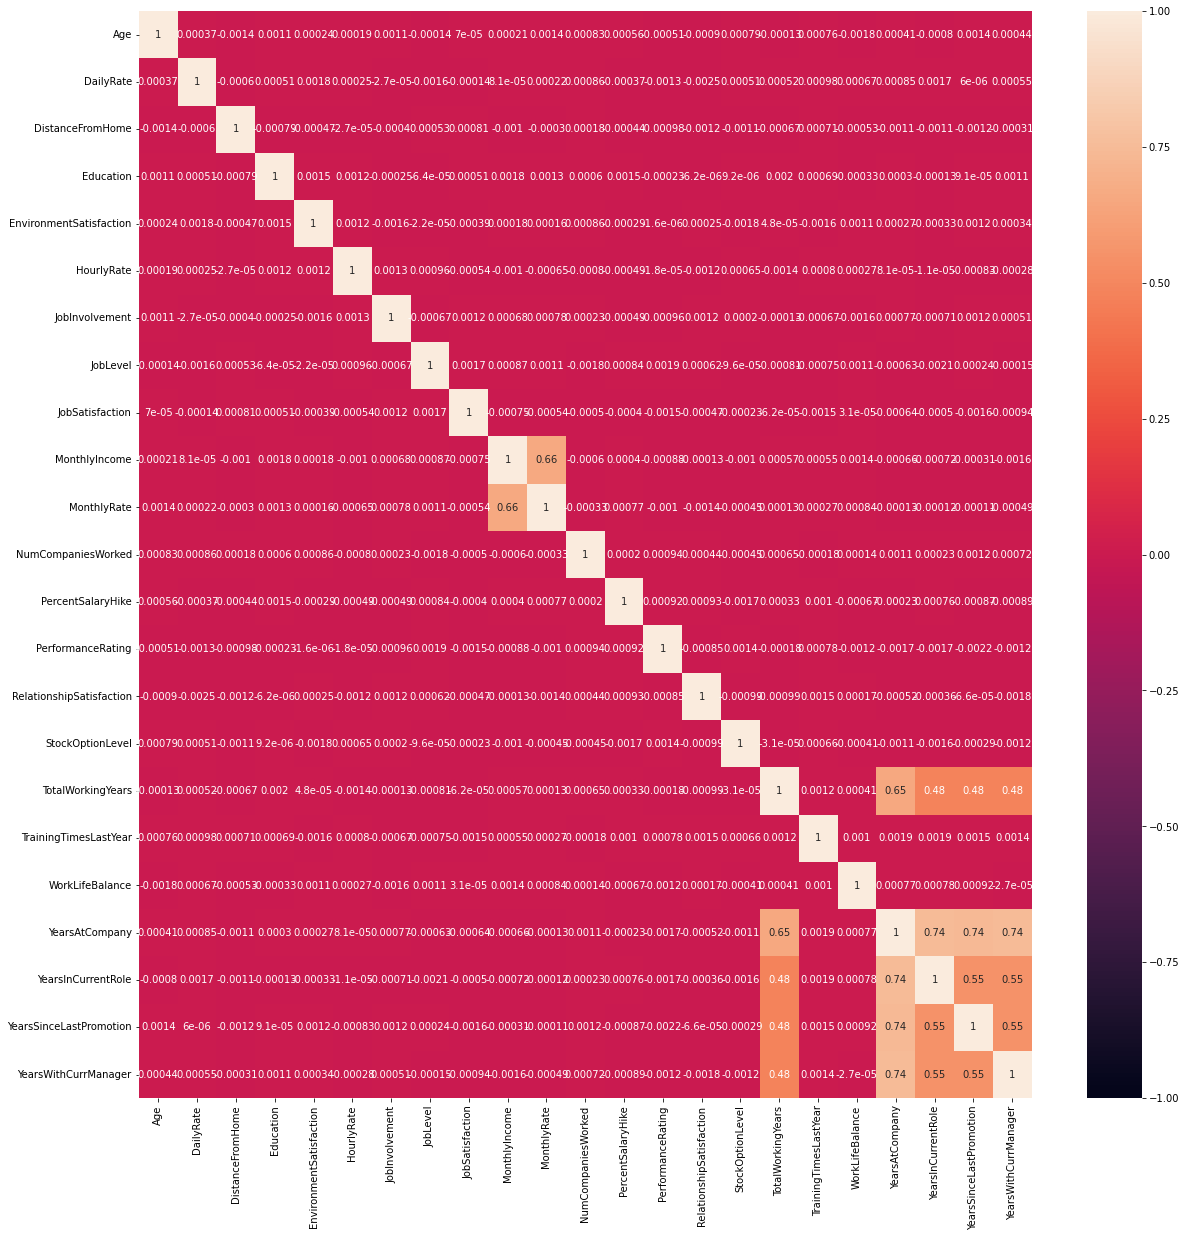

In [25]:
plt.figure(figsize = (20,20))
sb.heatmap(df.corr(), annot = True,vmin =-1,vmax =1)

In [26]:
df.shape

(1000000, 31)

In [30]:
df.to_csv("Emp_EDA.csv",index = False)